## Importing Necessary Libaries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option("display.max_columns", 50)

## Importing the data

In [2]:
df = pd.read_csv("day (1).csv")
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
467,468,13-04-2019,2,1,4,0,5,1,1,18.142500,21.59040,40.8333,10.416557,1252,5146,6398
541,542,26-06-2019,3,1,6,0,2,1,1,25.864153,29.73520,37.3333,23.292014,1077,6365,7442
97,98,08-04-2018,2,0,4,0,5,1,2,13.769153,16.22395,83.6250,15.208464,172,1299,1471
516,517,01-06-2019,2,1,6,0,5,1,2,26.820847,30.39810,75.5417,15.916721,533,3594,4127
674,675,06-11-2019,4,1,11,0,2,1,1,11.514153,14.07835,56.7083,11.625371,466,5220,5686


## Data Understanding and Preprocessing

In [3]:
df.shape

(730, 16)

df.info()

### Checking Null Values

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Dropping Unnecessary Columns

In [6]:
df.drop("instant",axis = 1,inplace = True)

In [7]:
df.drop("dteday",axis = 1,inplace = True)

### Categorical Columns

In [8]:
categorical_col = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
df[categorical_col] = df[categorical_col].astype("category")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 46.5 KB


In [10]:
continous_cols = ["temp","atemp","hum","windspeed","casual","registered","cnt"]
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
target = ["cnt"]

## Univariate Analysis - Numeric Columns

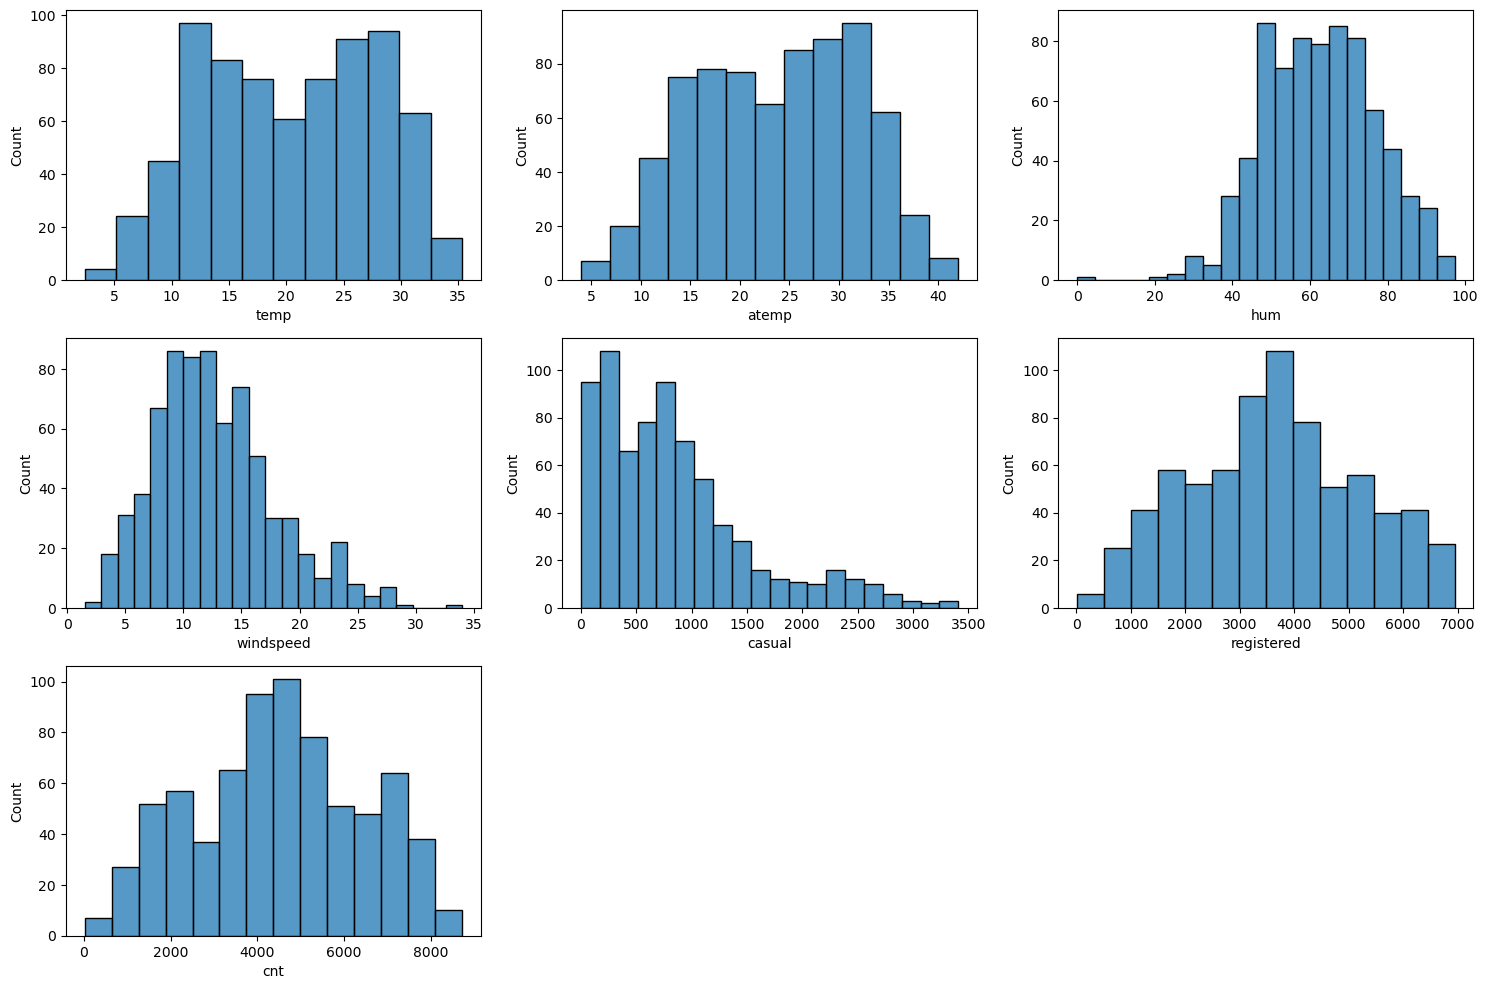

In [11]:
plt.figure(figsize = (15,10))

fignum = 0
for i in continous_cols:
    fignum = fignum +1
    plt.subplot(3,3,fignum)
    sns.histplot(x= df[i])
      
plt.tight_layout()  
plt.show()  

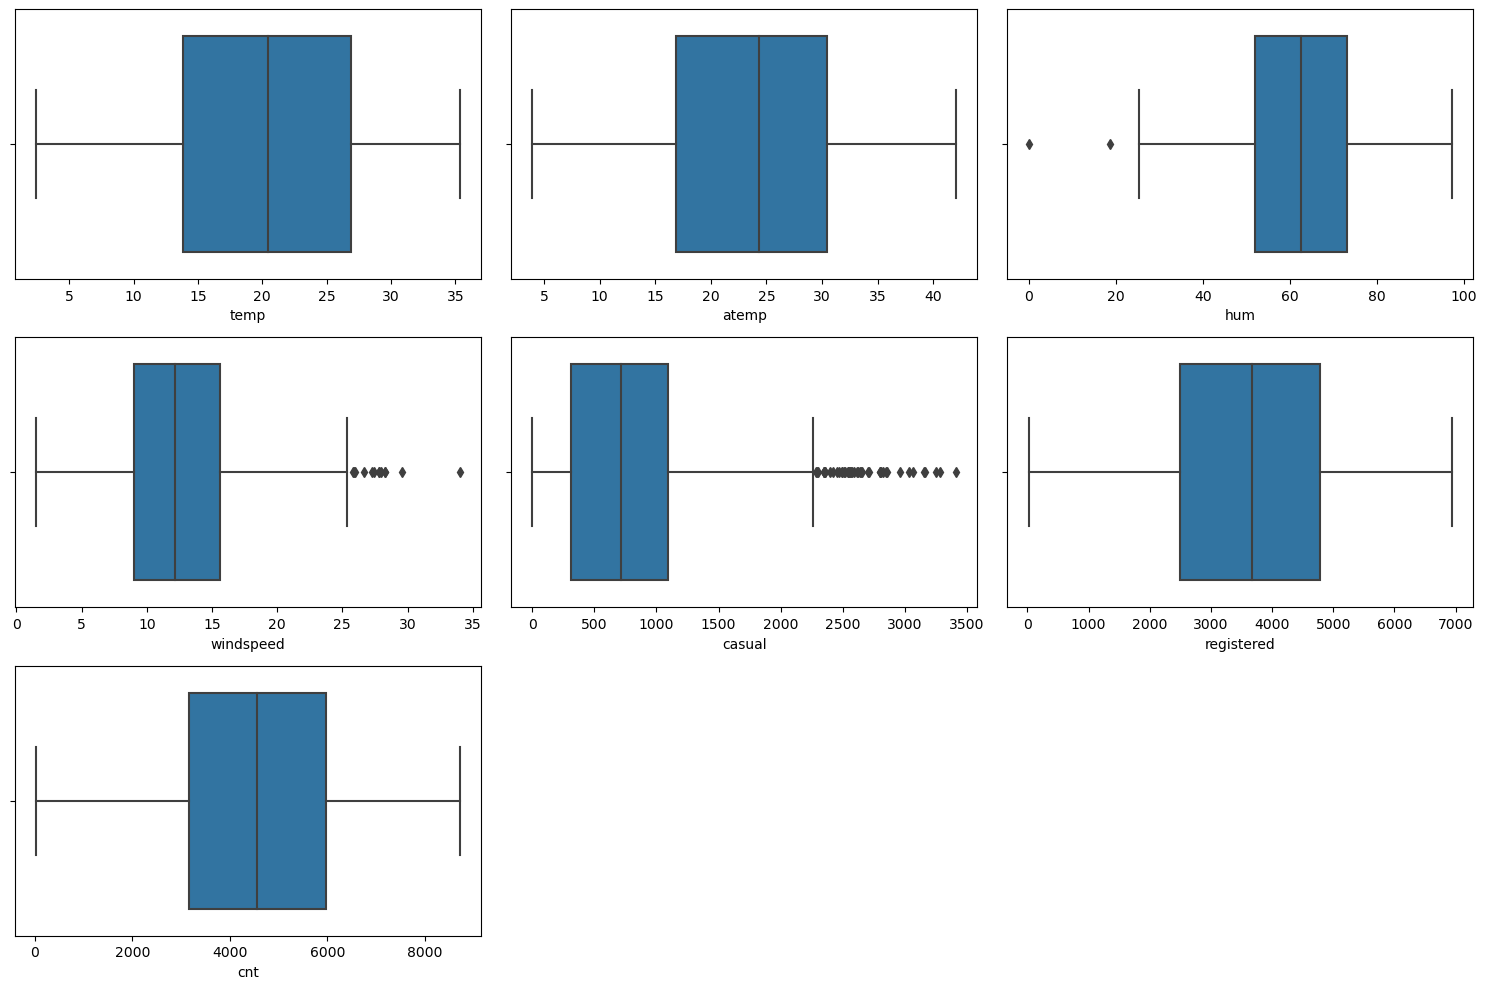

In [12]:
plt.figure(figsize = (15,10))

fignum = 0
for i in continous_cols:
    fignum = fignum +1
    plt.subplot(3,3,fignum)
    sns.boxplot(x= df[i])
      
plt.tight_layout()  
plt.show()  

## Univariate Analysis - Categorical Columns

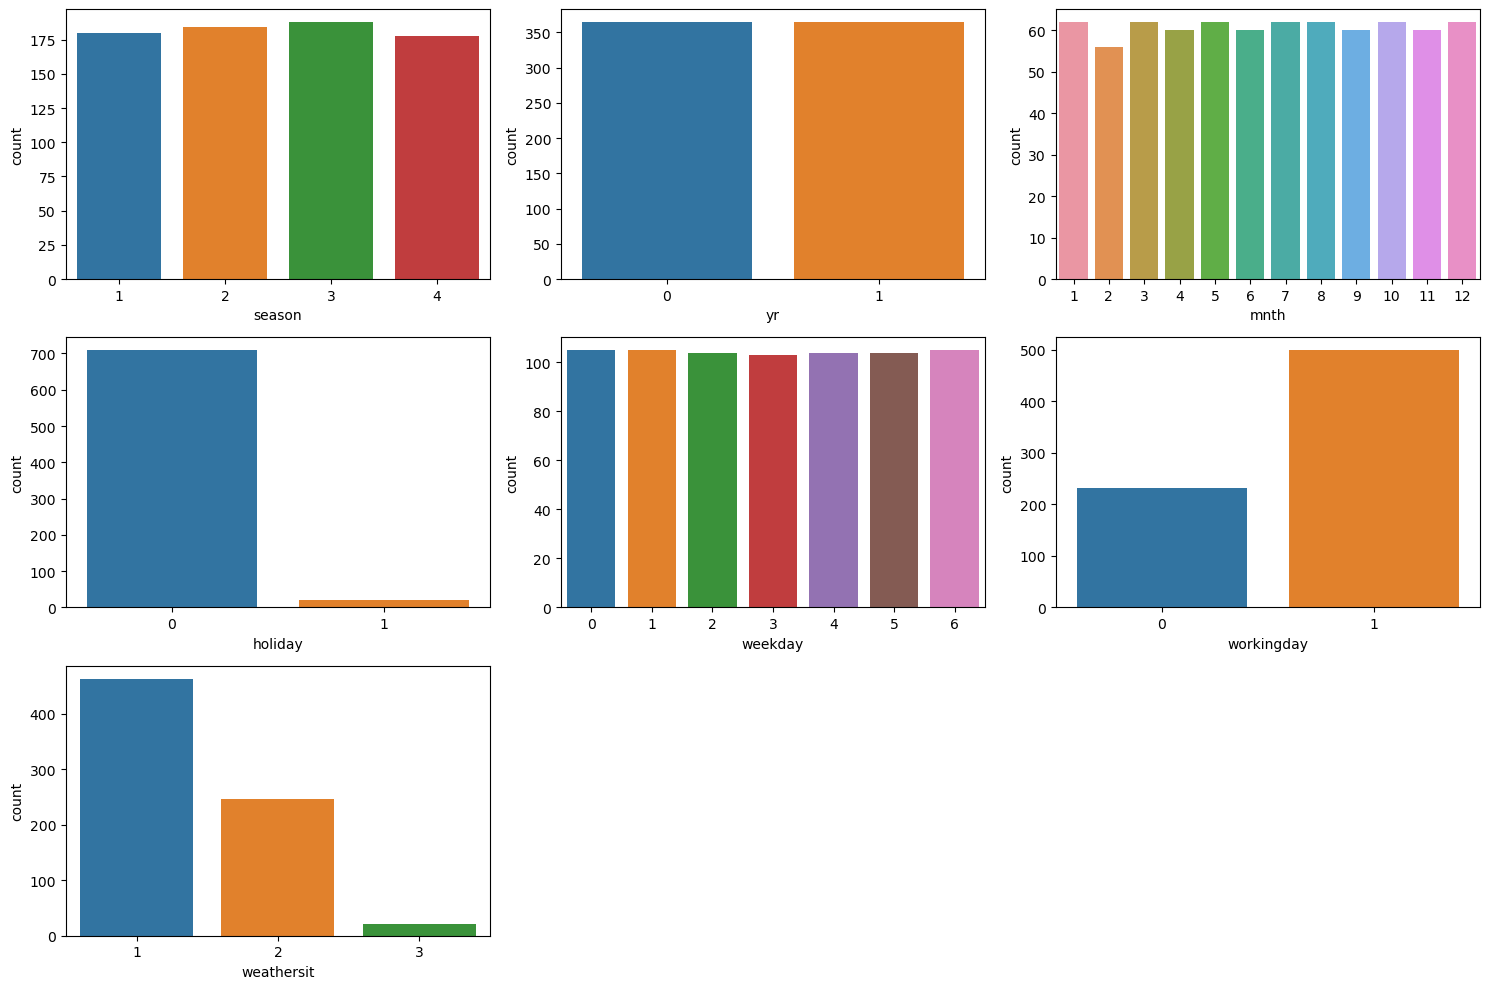

In [13]:
plt.figure(figsize = (15,10))

fignum = 0
for i in cat_cols:
    fignum = fignum +1
    plt.subplot(3,3,fignum)
    sns.countplot(x= df[i])
      
plt.tight_layout()  
plt.show()  

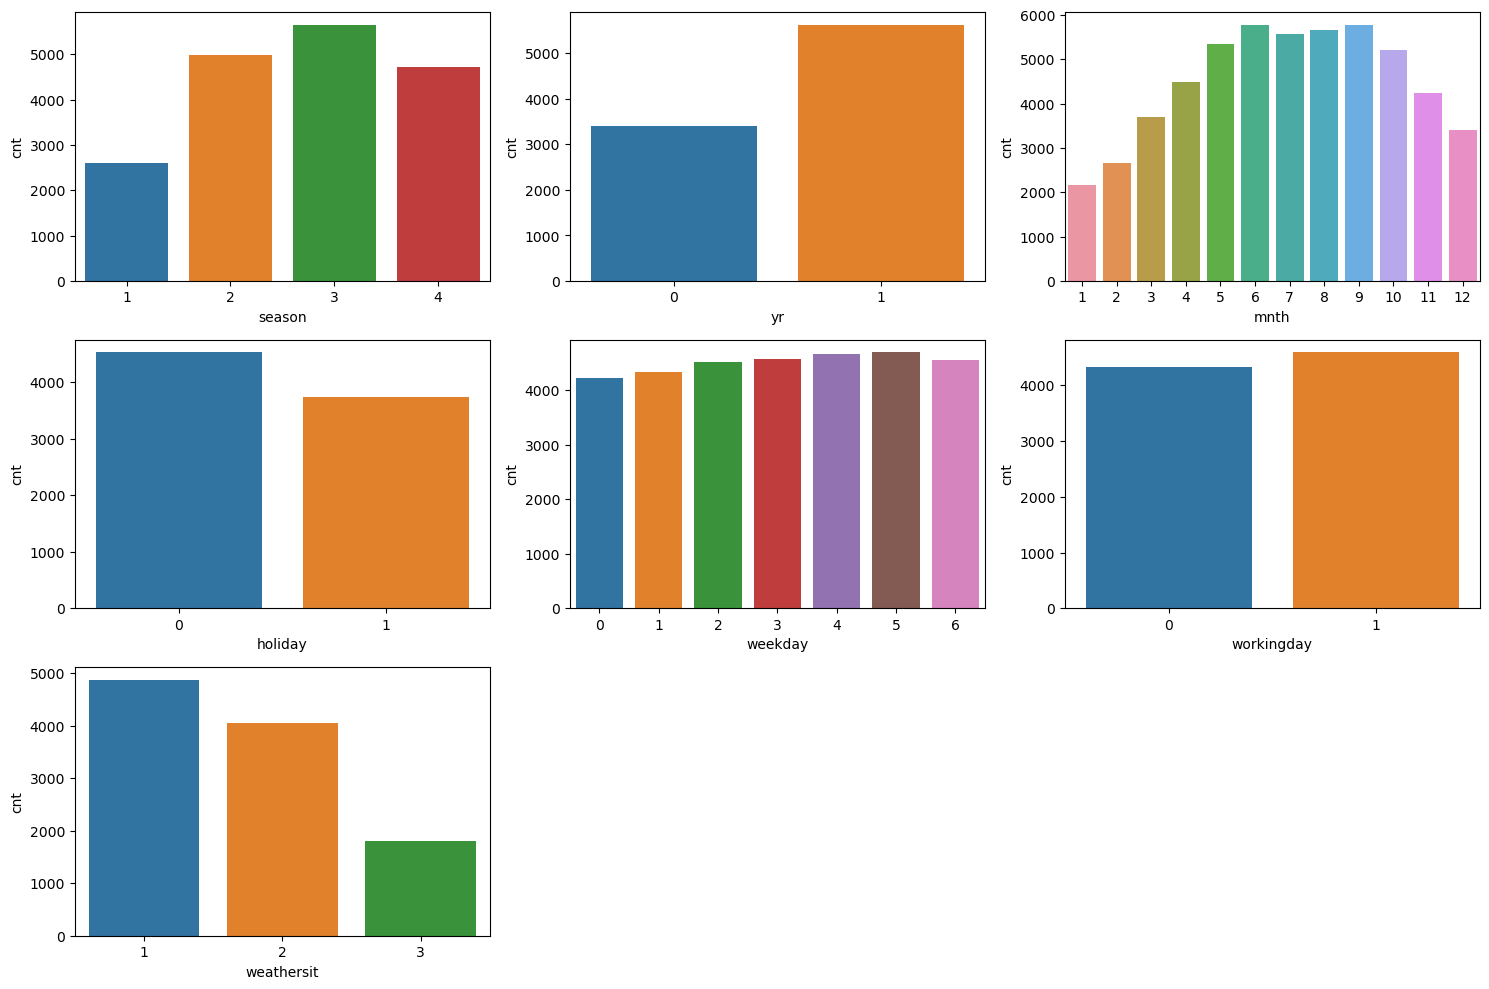

In [14]:
plt.figure(figsize = (15,10))

fignum = 0
for i in cat_cols:
    fignum = fignum +1
    plt.subplot(3,3,fignum)
    sns.barplot(x= df[i],y = df["cnt"],ci = None)
      
plt.tight_layout()  
plt.show()  

In [15]:
df[df["holiday"] == 1].shape

(21, 14)

In [16]:
df.drop("holiday",axis = 1,inplace = True)  # dropping holiday columns as it is highly imbalanced

## Bivariate Analysis

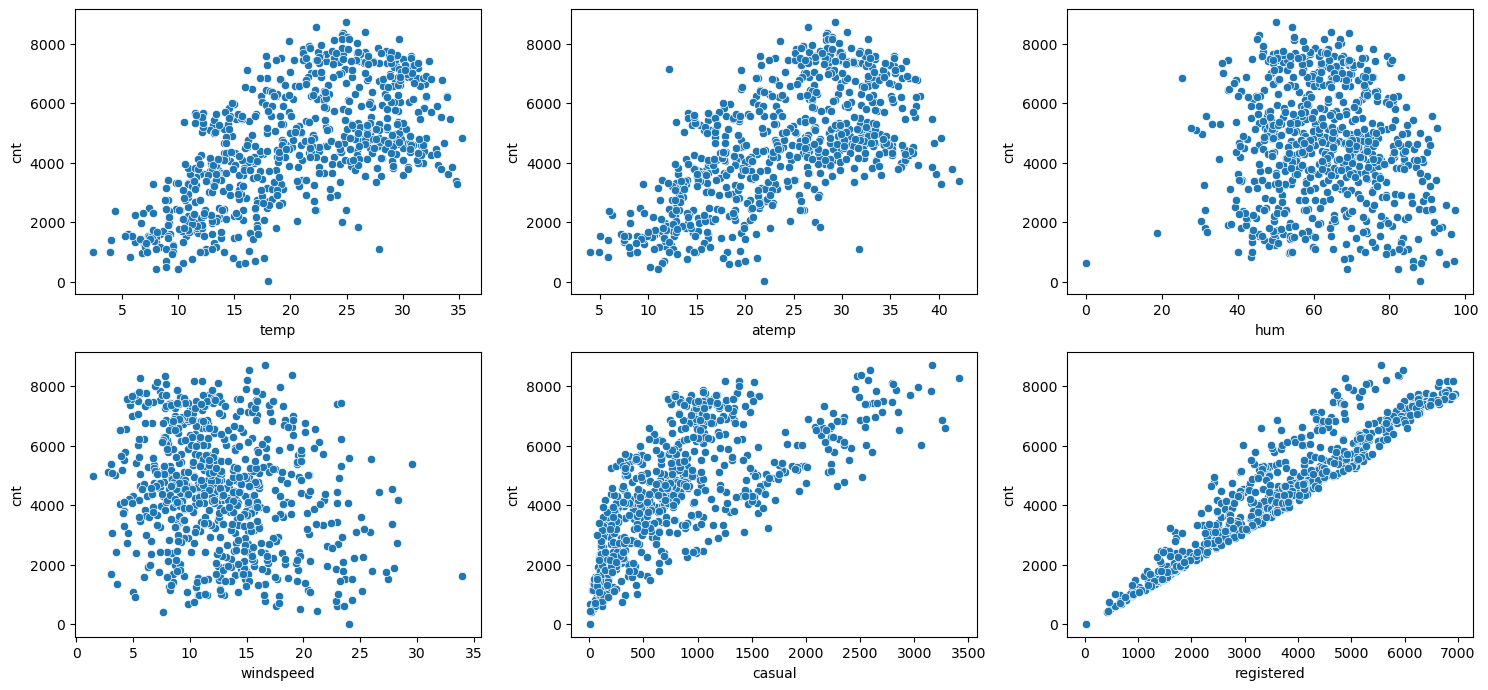

In [17]:
plt.figure(figsize = (15,10))

fignum = 0
for i in continous_cols:
    if i!= "cnt":
        fignum = fignum +1
        plt.subplot(3,3,fignum)
        sns.scatterplot(x= df[i],y = df["cnt"])

plt.tight_layout()  
plt.show()  

* Here we cn see that registered is highly correlated with cnt - following linear trend
* We can also observe as humidity increases cnt decreases

## Multivariate Analysis

In [18]:
pd.pivot_table(data = df,index = "season",columns = "mnth",values = "cnt",aggfunc = "count",margins = True)

mnth,1,2,3,4,5,6,7,8,9,10,11,12,All
season,,,,,,,,,,,,,
1,62,56,40,0,0,0,0,0,0,0,0,22,180
2,0,0,22,60,62,40,0,0,0,0,0,0,184
3,0,0,0,0,0,20,62,62,44,0,0,0,188
4,0,0,0,0,0,0,0,0,16,62,60,40,178
All,62,56,62,60,62,60,62,62,60,62,60,62,730


In [19]:
pd.pivot_table(data = df,index = "season",columns = "mnth",values = "cnt",aggfunc = "mean",margins = True)

mnth,1,2,3,4,5,6,7,8,9,10,11,12,All
season,,,,,,,,,,,,,
1,2176.33871,2669.964286,3551.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954.454545,2608.411111
2,NaN,NaN,3947.954545,4484.9,5349.774194,5773.850000,NaN,NaN,NaN,NaN,NaN,NaN,4992.331522
3,NaN,NaN,NaN,NaN,NaN,5769.400000,5563.677419,5664.419355,5672.704545,NaN,NaN,NaN,5644.303191
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6024.500000,5199.225806,4247.183333,4200.950000,4728.162921
All,2176.33871,2669.964286,3692.258065,4484.9,5349.774194,5772.366667,5563.677419,5664.419355,5766.516667,5199.225806,4247.183333,3403.806452,4508.006849


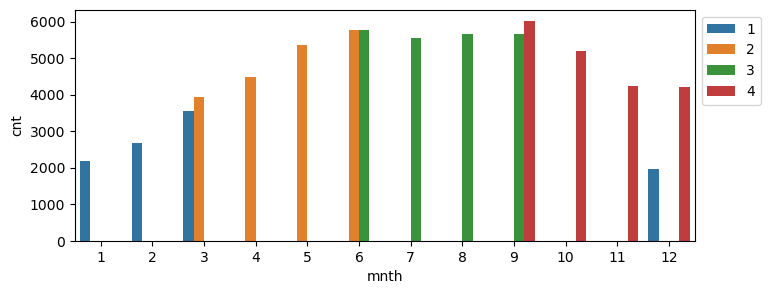

In [20]:
plt.figure(figsize = (8,3))
sns.barplot(data = df, x= "mnth",y = "cnt",hue = "season",ci = None)
plt.legend(loc = "best",bbox_to_anchor = (1,1))

<Axes: >

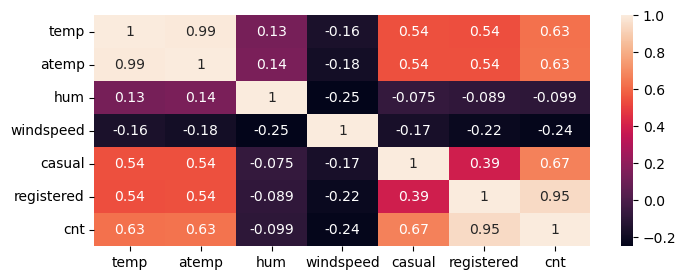

In [21]:
plt.figure(figsize = (8,3))
sns.heatmap(df.corr(),annot = True)

In [22]:
df.drop(columns =["casual","registered"],axis = 1,inplace = True) 

* casual and registered are highly correlation and it is summantion for cnt so im dropping them

## Train Test Split

In [23]:
x = df.drop("cnt",axis = 1)
y = df["cnt"]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

## Feature Scaling

In [25]:
scaler = MinMaxScaler()
numeric_col = x_train.select_dtypes(include = ["float64","int64"]).columns
x_train[numeric_col] = scaler.fit_transform(x_train[numeric_col])
x_test[numeric_col] = scaler.transform(x_test[numeric_col])

## One Hot Encoding

In [26]:
categorical_col = x_train.select_dtypes(include = "category").columns
categorical_col

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'], dtype='object')

In [27]:
x_train_dummies = pd.get_dummies(data = x_train,columns = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'],drop_first = True)
x_test_dummies =  pd.get_dummies(data = x_test,columns = ['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit'],drop_first = True)

## Feature Selection

In [28]:
x_train_dummies.columns = x_train_dummies.columns.astype("str")

In [29]:
estimator = LinearRegression()
rfe = RFE(estimator,n_features_to_select = 10)
rfe = rfe.fit(x_train_dummies,y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [30]:
best_features = x_train_dummies.columns[rfe.support_]
best_features

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [31]:
x_train = x_train_dummies[best_features]
x_test = x_test_dummies[best_features]

## Variance inflation factor

In [32]:
vif_data = pd.DataFrame()
vif_data["Features"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif_data

,Features,VIF
0,temp,409.678305
1,atemp,392.645470
2,hum,7.094058
3,windspeed,3.351251
4,season_2,3.673549
5,season_3,6.725169
6,season_4,2.538701
7,yr_1,1.952588
8,mnth_9,1.290801
9,weathersit_3,1.149145


## Model Building

In [33]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [34]:
lr_model_1 = sm.OLS(y_train,x_train)  # for statsmodels
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     249.6
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          1.97e-201
Time:                        17:48:25   Log-Likelihood:                -4744.4
No. Observations:                 584   AIC:                             9511.
Df Residuals:                     573   BIC:                             9559.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1825.7396    171.757     10.630   

In [35]:
x_train = x_train.drop("atemp",axis = 1)
x_test = x_test.drop("atemp",axis = 1)

* Feature atemp is insignificant so dropped it 

In [36]:
lr_model_2 = sm.OLS(y_train,x_train)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     277.4
Date:                Thu, 28 Sep 2023   Prob (F-statistic):          1.56e-202
Time:                        17:48:25   Log-Likelihood:                -4744.7
No. Observations:                 584   AIC:                             9509.
Df Residuals:                     574   BIC:                             9553.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1839.2490    170.832     10.766   

* This all features are highly significant

## Linear Regression

In [37]:
lr_model = LinearRegression()
lr_model = lr_model.fit(x_train[["temp","hum","windspeed","season_2","season_3","season_4","yr_1","mnth_9","weathersit_3"]],y_train)

In [38]:
print("Coefficient :",lr_model.coef_)

Coefficient : [ 4458.41293959 -1899.6062949  -1333.30498712  1059.57281695
   519.82999205  1389.72947626  1908.09971733   850.59549873
 -1325.81036262]


## Evaluation

In [39]:
y_pred = lr_model.predict(x_test[["temp","hum","windspeed","season_2","season_3","season_4","yr_1","mnth_9","weathersit_3"]])

In [40]:
Testing_Accuracy = np.round(r2_score(y_test,y_pred)*100,2)
Testing_Accuracy 

85.07

In [41]:
Testing_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
Testing_mape = np.mean(np.abs(y_test - y_pred)/y_test)*100

Testing_rmse = np.round(Testing_rmse,2)
Testing_mape = np.round(Testing_mape,2)


In [42]:
print("Testing Accuracy :",Testing_Accuracy,"%")
print("Testing Rmse :",Testing_rmse)
print("Testing Mape :",Testing_mape)

Testing Accuracy : 85.07 %
Testing Rmse : 813.09
Testing Mape : 21.58
